**Import Libraries**


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical

**Load and Preprocess Images**

In [5]:
data =[]
labels = []

IMG_SIZE = 128
DATASET_DIR = "Face-Mask-Detection_Dataset"

CATEGORIES = ["with_mask", "without_mask"]

for category in CATEGORIES:
    folder_path = os.path.join(DATASET_DIR, category)
    label = CATEGORIES.index(category)

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        try:
            img = cv2.imread(file_path)
            if img is None:
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)

        except Exception as e:
            print("Skipping:", file_path)

    

**Convert to Numpy & Normalize**

In [6]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

labels = to_categorical(labels, num_classes=2)


print("Total images:", data.shape[0])
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Total images: 3003
Data shape: (3003, 128, 128, 3)
Labels shape: (3003, 2)


**Train-Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels

)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2402
Testing samples: 601


**Build CNN Models**

In [8]:
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')

])



          

**Compile Model**

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [10]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)

)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.7927 - loss: 0.4675 - val_accuracy: 0.9151 - val_loss: 0.2598
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.8963 - loss: 0.2695 - val_accuracy: 0.8869 - val_loss: 0.2814
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9197 - loss: 0.2059 - val_accuracy: 0.9334 - val_loss: 0.1779
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9500 - loss: 0.1412 - val_accuracy: 0.9018 - val_loss: 0.2687
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9280 - loss: 0.1994 - val_accuracy: 0.9351 - val_loss: 0.1671
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.9534 - loss: 0.1285 - val_accuracy: 0.9401 - val_loss: 0.1490
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.9654 - loss: 0.0996 - val_accuracy: 0.9567 - val_loss: 0.1322
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9684 - loss: 0.0817 - val_accu

**Evaluate Model**

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9517 - loss: 0.1558 
Test Accuracy: 95.17%


**Plot Accuracy & Loss**

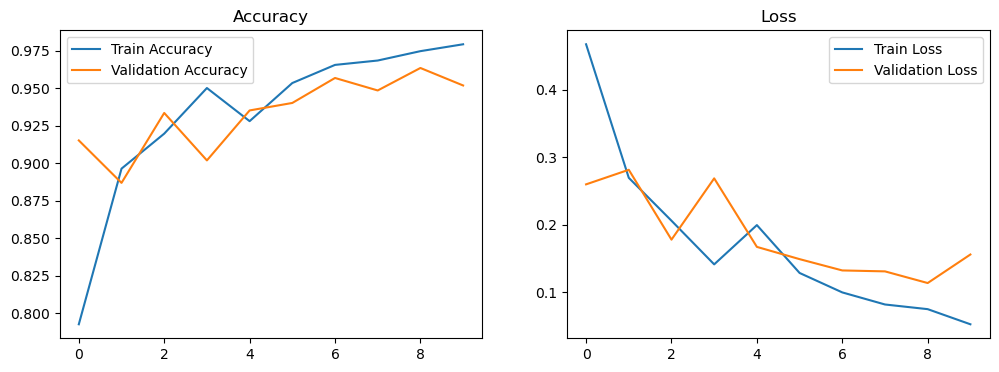

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

**Predict on One Test Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Prediction: with_mask


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

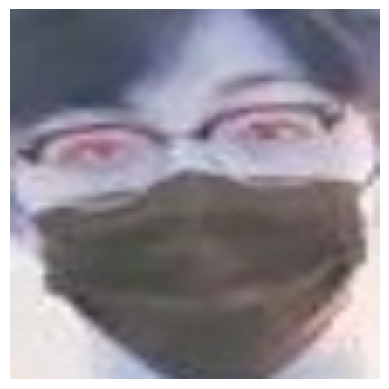

In [14]:
sample_img = X_test[0]
sample_input = np.expand_dims(sample_img, axis=0)

prediction = model.predict(sample_input)
predicted_class = np.argmax(prediction)

print("Prediction:", CATEGORIES[predicted_class])

plt.imshow(sample_img)
plt.axis("off")

**Save Model**

In [16]:
model.save("face_mask_detector.keras")
print("Model saved successfully.")

Model saved successfully.
